In [5]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

# open files
df_hdiy = pd.read_csv('../data/cleaned_hdi_py_data.csv')

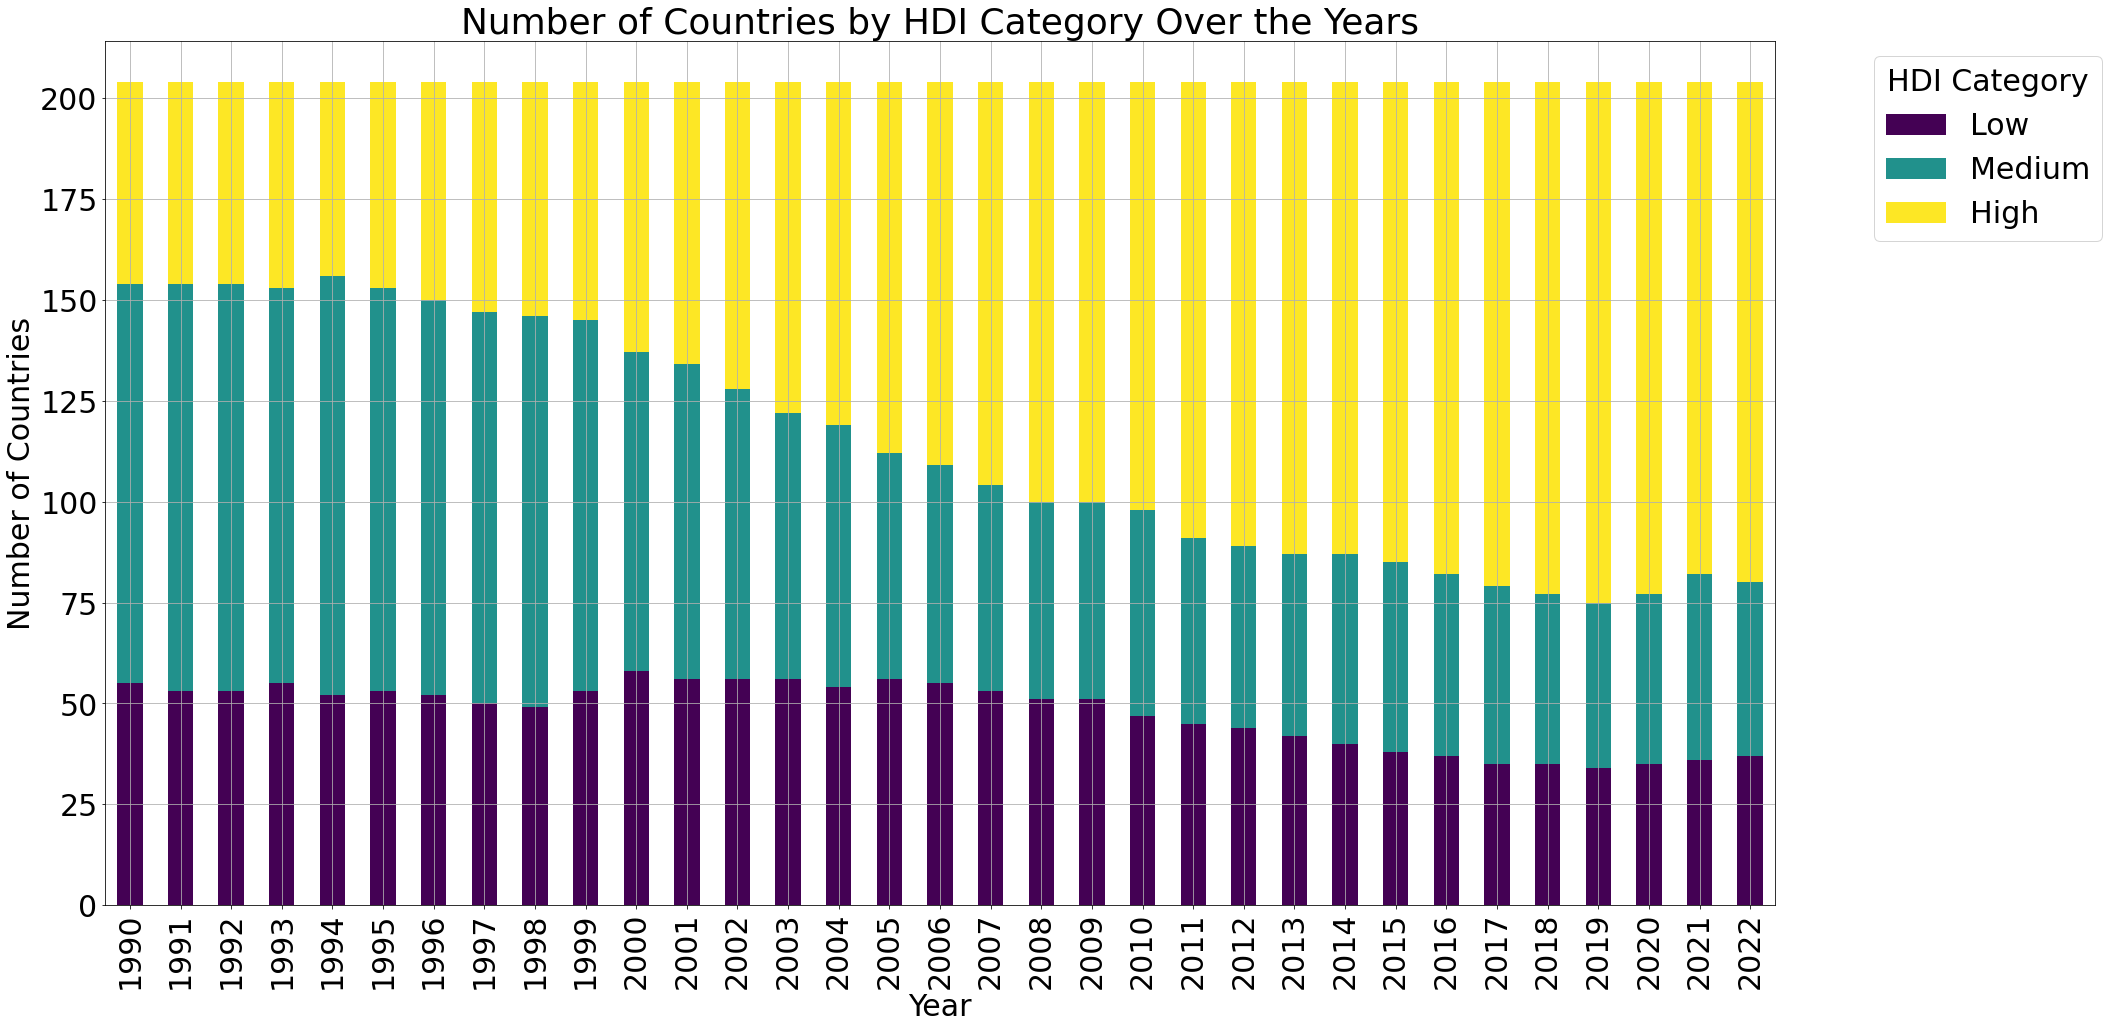

In [6]:
import matplotlib.pyplot as plt

years = list(range(1990, 2023))
hdi_columns = [f'hdi_{year}' for year in years]
df_hdiyn = df_hdiy[['country'] + hdi_columns]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Convert year to numeric
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0, 0.55, 0.70, 1.0]
labels = ['Low', 'Medium', 'High']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

#group by category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0)

df_grouped.plot(kind='bar', stacked=True, figsize=(30, 15), colormap='viridis')

plt.rc('font', size=30)
plt.title('Number of Countries by HDI Category Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(title='HDI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()